In [2]:
import pandas as pd
import sys
import os


notebook_dir = os.getcwd()

 
project_root = os.path.abspath(os.path.join(notebook_dir, '../../..'))


src_path = os.path.join(project_root, 'src')
sys.path.append(src_path)

In [3]:
from data_cleaning import load_data, clean_missing_values, remove_duplicates,  check_missing_values, check_duplicates, check_negative_values

from visualization import plot_cleaning_impact, plot_histogram, plot_scatter, plot_correlation_heatmap, plot_pairplot, plot_time_series, plot_cleaning_impact, plot_wind_rose, plot_histograms, plot_bubble_chart


In [4]:

file_path = r'C:\Users\HP\Desktop\EDA-week-0\data\togo-dapaong_qc\togo-dapaong_qc.csv'

# Load the data
df_togo = load_data(file_path)


df_togo.head()

Data loaded successfully from C:\Users\HP\Desktop\EDA-week-0\data\togo-dapaong_qc\togo-dapaong_qc.csv


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [5]:
df_togo.shape

(525600, 19)

In [6]:
df_togo.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [7]:
df_togo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [8]:
df_togo.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


check for null values, negative values, duplicate values and handle them

In [9]:
missing_info = check_missing_values(df_togo)
print(f"Missing Values Info:\n", missing_info)

Missing Values Info:
                Missing Values  Percentage
Timestamp                   0         0.0
GHI                         0         0.0
DNI                         0         0.0
DHI                         0         0.0
ModA                        0         0.0
ModB                        0         0.0
Tamb                        0         0.0
RH                          0         0.0
WS                          0         0.0
WSgust                      0         0.0
WSstdev                     0         0.0
WD                          0         0.0
WDstdev                     0         0.0
BP                          0         0.0
Cleaning                    0         0.0
Precipitation               0         0.0
TModA                       0         0.0
TModB                       0         0.0
Comments               525600       100.0


In [10]:
# Check for duplicates
duplicates = check_duplicates(df_togo)
print(f"\nNumber of duplicate rows: {duplicates}")



Number of duplicate rows: 0


In [11]:
# Check for negative values in specific columns 
negative_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
negative_info = check_negative_values(df_togo, negative_columns)
print("\nNegative Values Info:\n", negative_info)


Negative Values Info:
    Column  Negative Count
0     GHI          257385
1     DNI               0
2     DHI               0
3    ModA               0
4    ModB               0
5      WS               0
6  WSgust               0


In [12]:
# Handling Missing Value

df_togo = df_togo.dropna(axis=1, how='all')


In [13]:
df_togo.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB'],
      dtype='object')

In [14]:

# Convert all negative values in GHI to positive by taking the absolute value
df_togo['GHI'] = df_togo['GHI'].abs()


In [15]:
negative_columns = ['GHI']
negative_info = check_negative_values(df_togo, negative_columns)
print("\nNegative Values Info:\n", negative_info)


Negative Values Info:
   Column  Negative Count
0    GHI               0


#Data Visualization

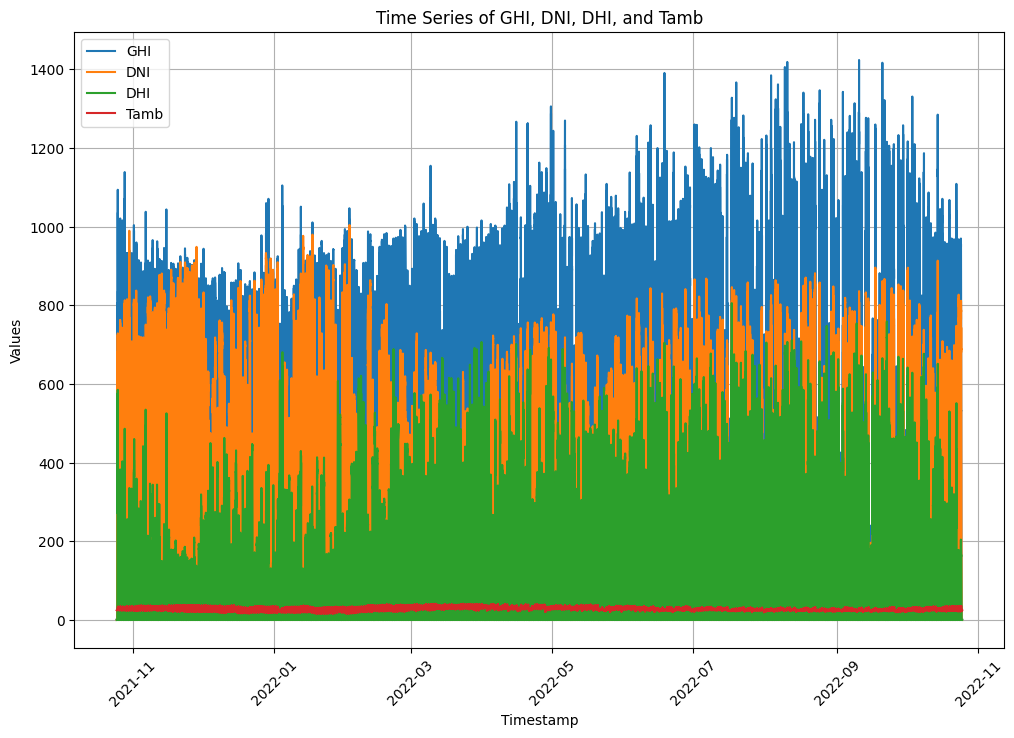

In [17]:

# Define the columns to plot
columns_to_plot = ['GHI', 'DNI', 'DHI', 'Tamb']

# Plot the time series
plot_time_series(df_togo, columns=columns_to_plot, time_column='Timestamp')

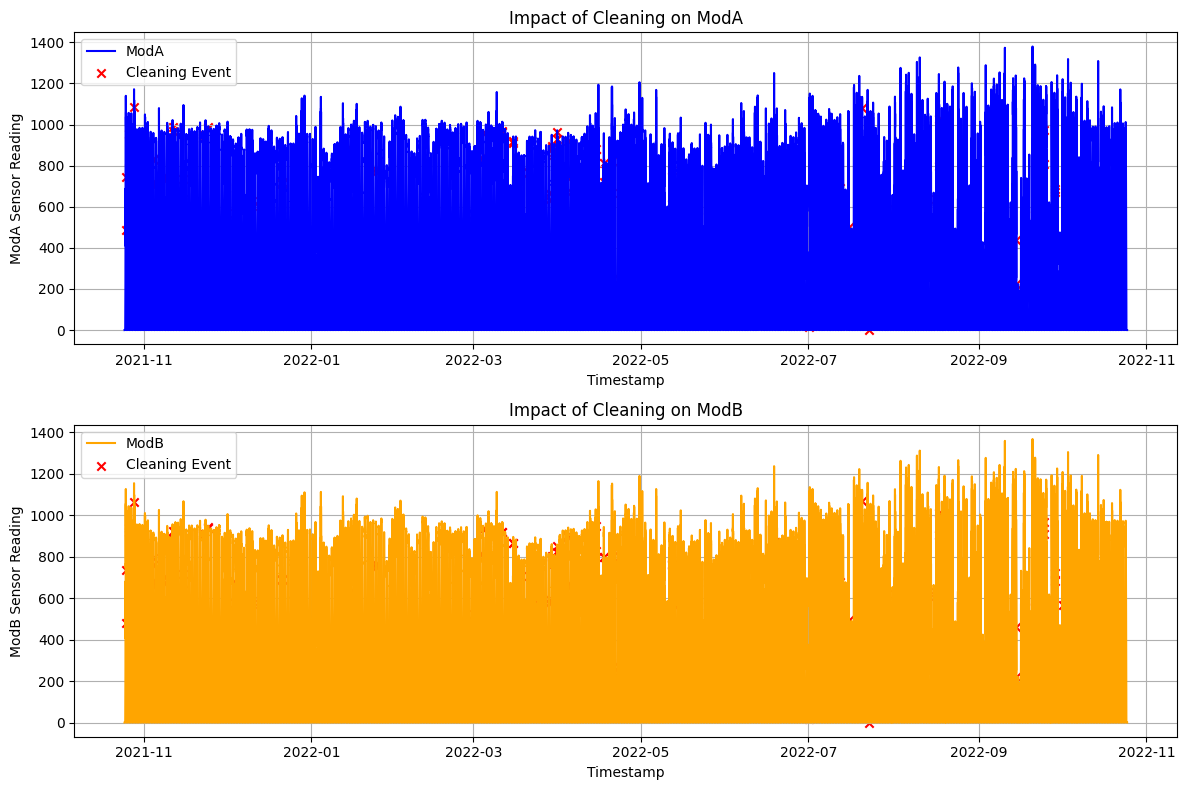

In [18]:
# Evaluate the Impact of Cleaning on ModA and ModB over time
plot_cleaning_impact(df_togo, time_column='Timestamp')

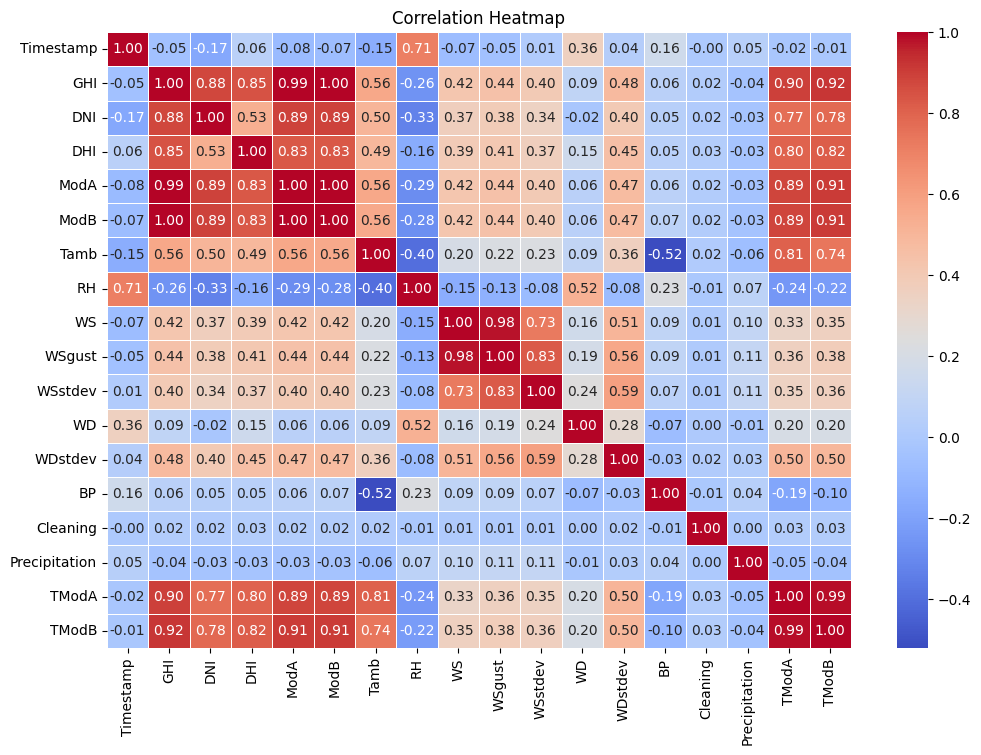

In [19]:
# Visualize the correlation heatmap
plot_correlation_heatmap(df_togo)

In [21]:
df_togo.corr()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
Timestamp,1.000000,-0.048527,-0.171813,0.055782,-0.081818,-0.074323,-0.151706,0.711630,-0.074907,-0.050330,0.013985,0.355868,0.035180,0.157959,-0.000136,0.046433,-0.018585,-0.011126
GHI,-0.048527,1.000000,0.877505,0.851136,0.994994,0.995468,0.562452,-0.261296,0.420850,0.442886,0.398545,0.087881,0.477907,0.059045,0.024686,-0.035035,0.897618,0.918668
DNI,-0.171813,0.877505,1.000000,0.532717,0.889702,0.889708,0.504499,-0.327887,0.366667,0.384870,0.343437,-0.017950,0.397511,0.047465,0.019777,-0.031397,0.765881,0.783572
DHI,0.055782,0.851136,0.532717,1.000000,0.833037,0.832648,0.489758,-0.155016,0.390597,0.410531,0.367005,0.154095,0.454318,0.052307,0.026179,-0.033330,0.802319,0.820360
ModA,-0.081818,0.994994,0.889702,0.833037,1.000000,0.999564,0.561114,-0.287038,0.420344,0.442563,0.398559,0.057154,0.472525,0.064175,0.022523,-0.034314,0.886888,0.906796
ModB,-0.074323,0.995468,0.889708,0.832648,0.999564,1.000000,0.556133,-0.280072,0.421543,0.443570,0.398978,0.061090,0.472106,0.068740,0.023482,-0.034269,0.885551,0.906427
Tamb,-0.151706,0.562452,0.504499,0.489758,0.561114,0.556133,1.000000,-0.400410,0.197145,0.221104,0.227084,0.094900,0.361367,-0.520770,0.019391,-0.060178,0.805580,0.740832
RH,0.711630,-0.261296,-0.327887,-0.155016,-0.287038,-0.280072,-0.400410,1.000000,-0.147589,-0.131119,-0.075714,0.521269,-0.075874,0.225176,-0.007095,0.068177,-0.244825,-0.224668
WS,-0.074907,0.420850,0.366667,0.390597,0.420344,0.421543,0.197145,-0.147589,1.000000,0.977587,0.728018,0.164655,0.505133,0.087915,0.008371,0.099562,0.328273,0.353334
WSgust,-0.050330,0.442886,0.384870,0.410531,0.442563,0.443570,0.221104,-0.131119,0.977587,1.000000,0.827358,0.185546,0.562013,0.085957,0.009440,0.107898,0.357374,0.380626


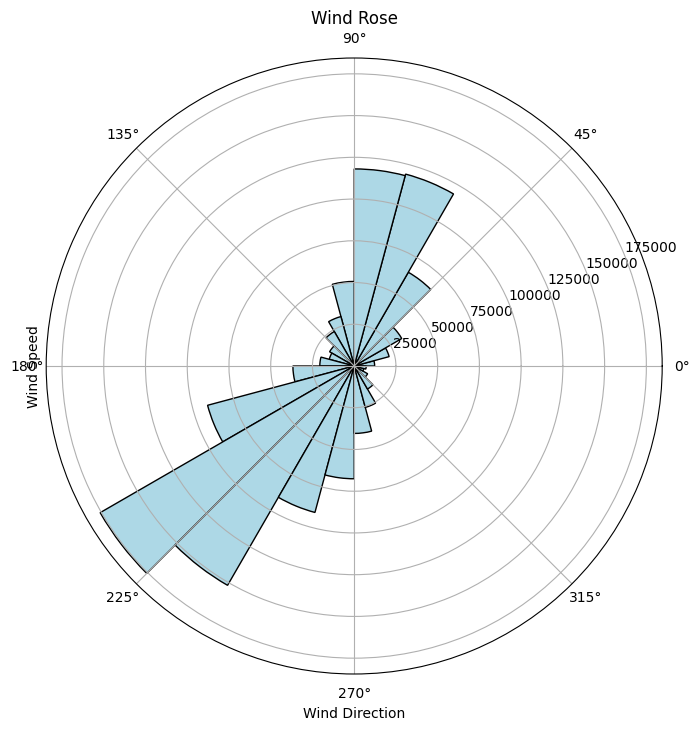

In [22]:
#  Wind Analysis using Wind Rose (Wind Direction and Speed)
plot_wind_rose(df_togo, wind_direction_column='WD', wind_speed_column='WS')

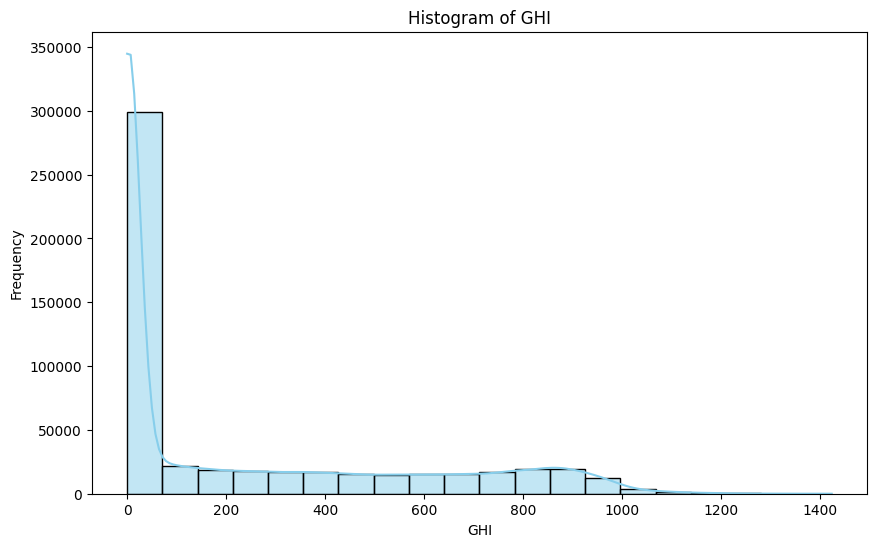

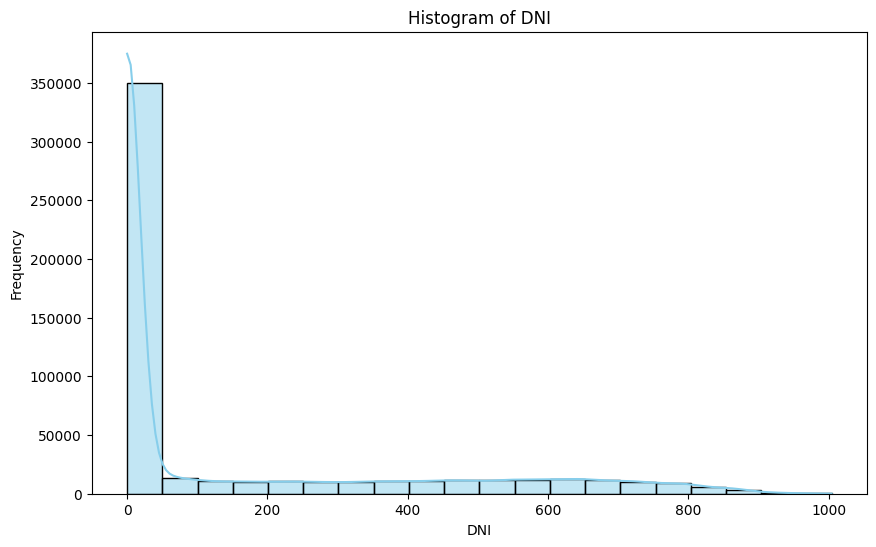

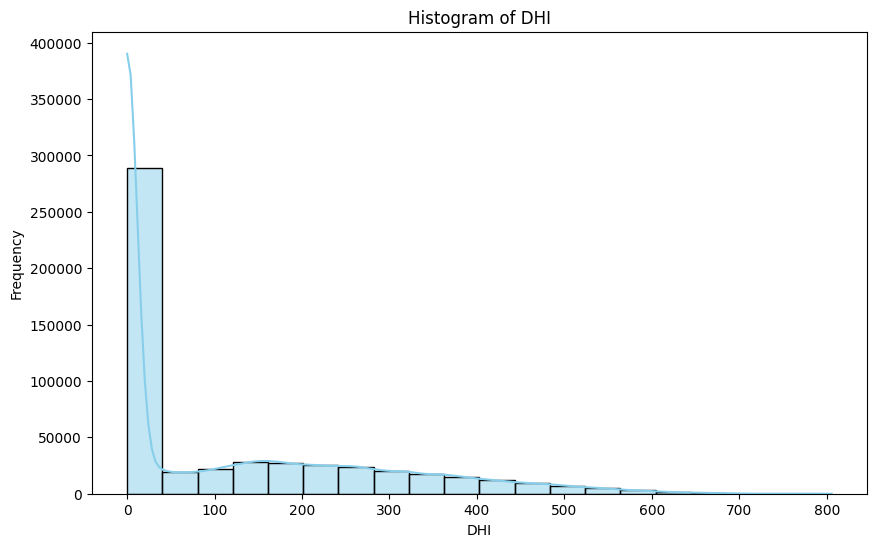

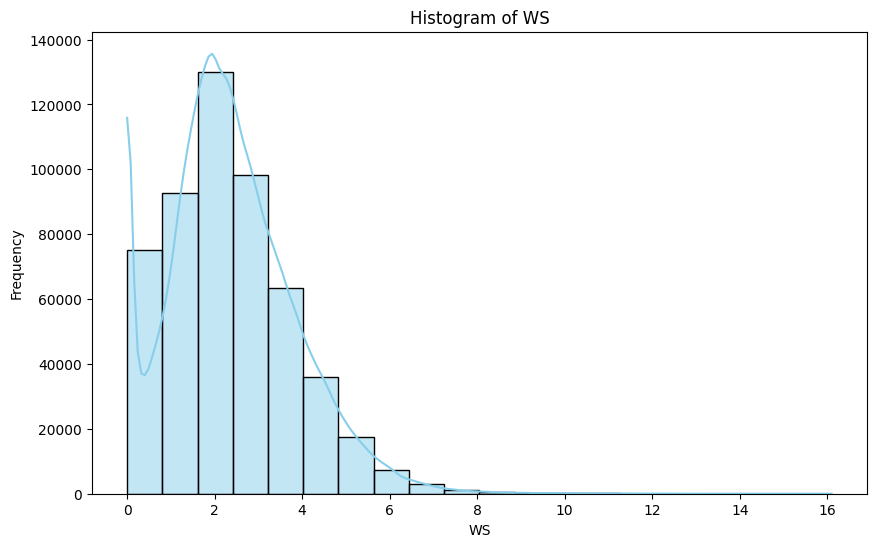

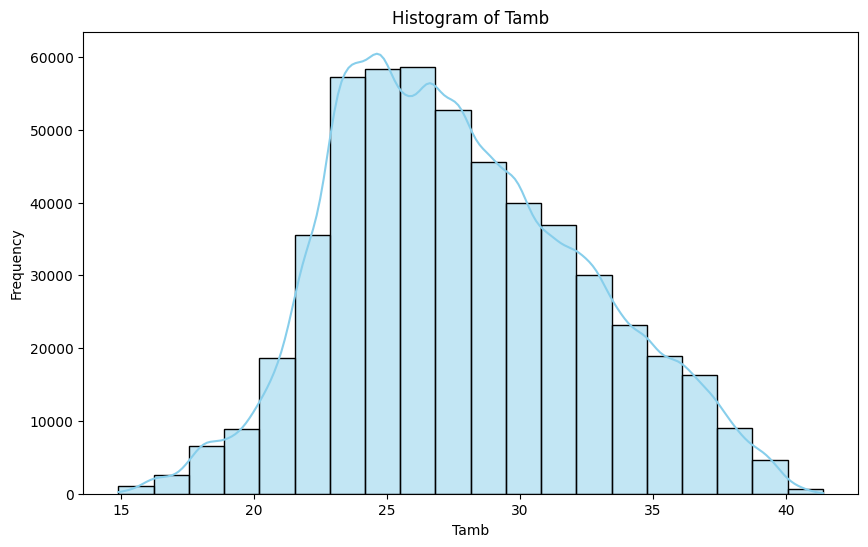

In [24]:
# Histograms for GHI, DNI, DHI, WS, and Tamb
plot_histograms(df_togo)

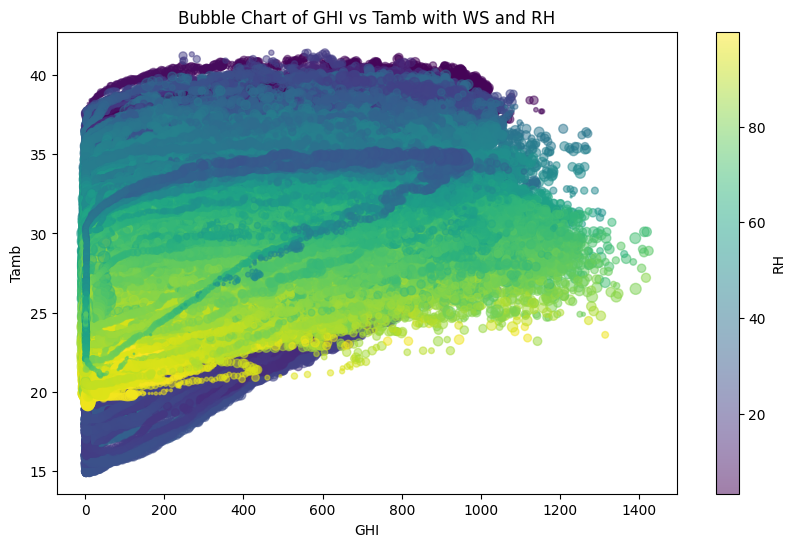

In [25]:
# Bubble Chart to explore complex relationships between GHI, Tamb, WS, and RH
plot_bubble_chart(df_togo, x_column='GHI', y_column='Tamb', size_column='WS', color_column='RH')